In [30]:
import pandas as pd


from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('quality.csv')

In [3]:
df.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,0,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,0,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,0,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,0,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,0,0,0


In [9]:
#metrics = pd.DataFrame(df, columns = ["x1","x2","x3","x4","x5","x6"])
metrics = df.drop(columns=["PoorCare"]) #is the same to above line, when you don't want to type one by one
target = pd.DataFrame(df, columns = ["PoorCare"])

In [13]:
glm = linear_model.LogisticRegression()

In [14]:
model = glm.fit(metrics, target)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
predictions = glm.predict(metrics)

In [20]:
cm = confusion_matrix(target, predictions)
print(cm)

[[92  6]
 [18 15]]


In [21]:
total = sum(sum(cm))#sum of 4 cells
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

0.816793893129771


In [22]:
glm.score(metrics, target) #is the same as accuracy

0.816793893129771

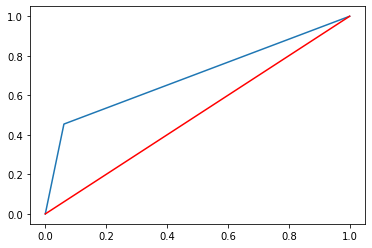

In [29]:
fpr, tpr, thresholds = roc_curve(target, predictions)
plt.plot(fpr, tpr)
plt.plot([0,1], 'r')
plt.show()

In [25]:
#auc
logit_roc_auc = roc_auc_score(target, predictions)
print(logit_roc_auc)

0.6966604823747681


always need to break dataset into training and testing dataset

# KNN K-Nearest Neighbor

In [31]:
df = pd.read_csv('class-knn.csv')

In [32]:
df.head()

,class,x1,x2,x3
0,class1,1,11,51
1,class1,2,11,51
2,class1,3,22,51
3,class1,4,55,52
4,class1,1,12,55


In [36]:
metrics = df.drop("class", axis=1)#axis means column
#if we write metrics = df.drop(columns=["class"]) then do not need to add axis=1
target= pd.DataFrame(df, columns = ["class"])

In [37]:
metrics.head()

,x1,x2,x3
0,1,11,51
1,2,11,51
2,3,22,51
3,4,55,52
4,1,12,55


In [38]:
target.head()

,class
0,class1
1,class1
2,class1
3,class1
4,class1


In [41]:
temp = pd.DataFrame(preprocessing.scale(metrics, with_mean=False))
temp.columns=metrics.columns
metrics=temp

In [42]:
metrics.head()

,x1,x2,x3
0,0.005706,0.018631,0.011939
1,0.011412,0.018631,0.011939
2,0.017118,0.037262,0.011939
3,0.022824,0.093154,0.012173
4,0.005706,0.020325,0.012875


In [54]:
metrics_train, metrics_test, target_train, target_test = train_test_split(metrics, target, test_size=0.25)

In [76]:
classifier = KNeighborsClassifier(n_neighbors=4)
#k=class +1, if k=3 找最近的3个看哪个class最多就归类为哪个class

In [56]:
classifier.fit(metrics_train, target_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [58]:
prediction = classifier.predict(metrics_test)

In [60]:
confusion_matrix(target_test, prediction)

array([[3, 0, 0],
       [0, 3, 0],
       [2, 0, 0]])

In [61]:
print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

      class1       0.60      1.00      0.75         3
      class2       1.00      1.00      1.00         3
      class3       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.53      0.67      0.58         8
weighted avg       0.60      0.75      0.66         8



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## iris eg

In [62]:
df = pd.read_csv('iris.csv')

In [63]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
metrics = df.drop("Class", axis=1)
target= pd.DataFrame(df, columns = ["Class"])

In [66]:
metrics.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
target.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [68]:
temp = pd.DataFrame(preprocessing.scale(metrics, with_mean=False))
temp.columns=metrics.columns
metrics=temp

In [69]:
metrics.head()

,sepal-length,sepal-width,petal-length,petal-width
0,6.179561,8.099104,0.796120,0.262946
1,5.937226,6.942089,0.796120,0.262946
2,5.694890,7.404895,0.739254,0.262946
3,5.573722,7.173492,0.852986,0.262946
4,6.058394,8.330507,0.796120,0.262946


In [88]:
metrics_train, metrics_test, target_train, target_test = train_test_split(metrics, target, test_size=0.2)

In [89]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [90]:
classifier.fit(metrics_train, target_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
prediction = classifier.predict(metrics_test)

In [92]:
confusion_matrix(target_test, prediction)

array([[11,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  6]])

In [93]:
print(classification_report(target_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.75      0.86         8

       accuracy                           0.93        30
      macro avg       0.95      0.92      0.92        30
   weighted avg       0.94      0.93      0.93        30

